<a href="https://www.kaggle.com/code/triowibowo28/cyclistic-bike-share-analysis?scriptVersionId=204585781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Background

This is case study from the **Google Data Analytics Certificate** about **How did a bike-share business achieve success?**

Cyclistic is the company bike-share from Chicago which has more than 5,800 bikes and 600 docking stations. Cyclistic offers **reclining bikes, hand tricycles and cargo bikes**, making bike-share more inclusive for disabilities user and customer who cannot use standard two-wheeled bicycles. The majority of customer choose classic bikes. About 8% of drivers use the assistance option. Riders Bike are more likely to cycle for leisure, but around 30% use it to commute to work every day.

Currently Cyclistic's marketing strategy has relied on building general awareness and appealing to broad consumer segments. One approach that helps make this happen is price flexibility: 
- one-way tickets, 
- full-day tickets, and 
- annual memberships 

Customers who purchase a one-way ticket or a full day ticket are referred to as casual. Customers who purchase annual memberships are Cyclistic members. Cyclistic's financial analysts have concluded that annual members are much more profitable than casual riders. While the price flexibility is helping Cyclistic attract more customers, **Moreno** (Marketing Directors) believes that maximizing the number of annual members will be the key to future growth.

# Purpose

In this project, I am as a **data analyst** have task to collecting, analyzing, and reporting data that helps guide Cyclistic's marketing strategy.

The stakeholder is come from :
- **executive team** (this team will decide whether they approve the recommended marketing), and
- **Lily Moreno** (Marketing Directors)

In this case I have a big qutestion **"How is the trend of casual and members user using Cyclistic bicycles differently?"** From this question we have the goal to **created a new marketing strategy for convert casual riders bike to join in membership**.

So that for this case, I use **6 (six) Steps of Process Analysis** (ask, prepare, process, analysis, share, and act) to get inshigt from data at last 12 month (August 2022 - July 2023) created strategy business or decision making for my stakeholder.

# Ask
**Identify the business task**

From this case **Moreno** (my stakholder) have some question about : 
- How do members and casual riders bike use their bikes differently?
- Why do regular riders bike buy an Cyclistic membership?
- How does Cyclistic use digital media to influence casula riders bike to become members?

To answer of the question I have business task to identify  **How members and casual riders bike use bicycles with differently?**


# Prepare
**1. Data source** 

I was provided with historical bicycle trips data by Cyclistic to analyze and identify trends. Download Bike trip data for the previous 12 months (August 2022 - July 2023). (source : **[in here](https://divvy-tripdata.s3.amazonaws.com/index.html>)**)

**2. Identify Tools**

All data trips in comma-delimited (.CSV) format with 15 columns, size more than 130 MB and there are 12 files, so that :
- Using excel and google sheet is not good choice because that is have capacity limitations.
- Databases on bigquery or postgreSQL have large storage, so I can import the data to database, combine and then analysis, but for visualization I must use separate tools like looker stuido (google studio), power BI or tableau.
- R studio or Jupyter Notebook can be best choice because it can import data, analysis and make visualization, and for this project I use R programming.


# Process
**1. Install Packages**

I must Install required packages : 
- tidyverse for data import and wrangling
- data.table to extract data from zip file
- lubridate for date functions
- ggplot for visualization
- modeest for analysis

In [1]:
library(tidyverse)  # helps wrangle data
library(lubridate)  # helps wrangle date attributes
library(ggplot2)  # helps visualize data
library(data.table) # extract data from zip file
library(modeest)  # for get Modus from the data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr



**2. Import Data**

Collect the data from the source and then include data in to data frame

In [2]:
# import data from https://divvy-tripdata.s3.amazonaws.com

bike_share_trips_202208 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202208-divvy-tripdata.zip | funzip")
bike_share_trips_202209 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202209-divvy-tripdata.zip | funzip")
bike_share_trips_202210 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202210-divvy-tripdata.zip | funzip")
bike_share_trips_202211 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202211-divvy-tripdata.zip | funzip")
bike_share_trips_202212 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202212-divvy-tripdata.zip | funzip")
bike_share_trips_202301 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202301-divvy-tripdata.zip | funzip")
bike_share_trips_202302 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202302-divvy-tripdata.zip | funzip")
bike_share_trips_202303 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202303-divvy-tripdata.zip | funzip")
bike_share_trips_202304 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202304-divvy-tripdata.zip | funzip")
bike_share_trips_202305 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202305-divvy-tripdata.zip | funzip")
bike_share_trips_202306 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202306-divvy-tripdata.zip | funzip")
bike_share_trips_202307 <- fread("curl https://divvy-tripdata.s3.amazonaws.com/202307-divvy-tripdata.zip | funzip")

Check each data frame to see the **number of rows, list column and data type**.

In [3]:
# check the data

glimpse(bike_share_trips_202208)

Rows: 785,932
Columns: 13
$ ride_id            <chr> "550CF7EFEAE0C618", "DAD198F405F9C5F5", "E6F2BC47B6…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2022-08-07 21:34:15, 2022-08-08 14:39:21, 2022-08-…
$ ended_at           <dttm> 2022-08-07 21:41:46, 2022-08-08 14:53:23, 2022-08-…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_lat          <dbl> 41.93, 41.89, 41.97, 41.94, 41.85, 41.79, 41.89, 41…
$ start_lng          <dbl> -87.69, -87.64, -87.69, -87.65, -87.65, -87.72, -87…
$ end_lat            <dbl> 41.94, 41.92, 41.97, 41.97, 41.84, 41.82, 41.89, 41…
$ end_lng            <dbl> -87.72, -87.64, -87.66, -87.69, -87.66, -87.69, -87…
$ member_casua

From this databse we know about a file have :
- 785,932 Rows
- 13 column with : 

    - 2 column with data type datetime : started_at, ended_at
    - 7 column with data type charater : ride_id, rideable_type, start_station_name, start_station_id, end_station_name, end_station_id, member_casual
    - 4 column with data type double  : start_lat, start_lng, end_lat, end_lng

**3. Combined all data**

All data frame combine into one large data frame (in this case we call **all_trips**) which have all data trips from last 12 month (August 2022 - July 2023)

In [4]:
all_trips <- bind_rows(bike_share_trips_202208
                        , bike_share_trips_202209
                        , bike_share_trips_202210
                        , bike_share_trips_202211
                        , bike_share_trips_202212
                        , bike_share_trips_202301
                        , bike_share_trips_202302
                        , bike_share_trips_202303
                        , bike_share_trips_202304
                        , bike_share_trips_202305
                        , bike_share_trips_202306
                        , bike_share_trips_202307
                        )

**4. Clean up, Modified and Add Data**

From the data **all_trips** have some field not use for analysis like start_lat, start_lng, end_lat and end_lng. So in this step thats field will be remove from the data. Combine all data can make remove field process easier because you don't have remove each data frame in different code

In [5]:
# Remove start_lat, start_lng, end_lat and end_lng fields 

all_trips <- all_trips %>% 
            select(-c(start_lat, start_lng, end_lat, end_lng))

The data can only be aggregated at the ride-level, which is too granular. I want to add some additional columns of data such as day, month, year that provide additional opportunities to aggregate the data.

In [6]:
# Add columns that list the hour, date, month, day, year and ride_length calculation to all_trips (in minutes) of each ride
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html

all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
all_trips$number_day_of_week <- wday(all_trips$date)
all_trips$ride_length <- as.numeric(difftime(all_trips$ended_at,all_trips$started_at))/60

In ride_length there are some riders bike have duration with negative value must be clean it.

In [7]:
negative_trip_duration <- count(all_trips[(all_trips$ride_length<0)])
message('total trips with negative value duration is ', negative_trip_duration, ' from ', prettyNum(count(all_trips), big.mark=","), ' row')

total trips with negative value duration is 121 from 5,723,606 row



There are 121 row anomali data so we want to clean it but I created in diffrernt data frame so it doesn't change the original source (in this case we name **all_trips_v2**)

In [8]:
# Remove "bad" data with ride_length was negative
# We will create a new version of the dataframe (v2) since data is being removed
# https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/

all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

In [9]:
# final result 

glimpse(all_trips_v2)

Rows: 5,723,485
Columns: 16
$ ride_id            <chr> "550CF7EFEAE0C618", "DAD198F405F9C5F5", "E6F2BC47B6…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2022-08-07 21:34:15, 2022-08-08 14:39:21, 2022-08-…
$ ended_at           <dttm> 2022-08-07 21:41:46, 2022-08-08 14:53:23, 2022-08-…
$ start_station_name <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ start_station_id   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_name   <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ end_station_id     <chr> "", "", "", "", "", "", "", "", "", "", "", "", "",…
$ member_casual      <chr> "casual", "casual", "casual", "casual", "casual", "…
$ date               <date> 2022-08-07, 2022-08-08, 2022-08-08, 2022-08-08, 20…
$ month              <chr> "08", "08", "08", "08", "08", "08", "08", "08", "08…
$ day                <chr> "07", "08", "08", "08", "07", "08", "08", "07", "07…
$ year      

finnaly the data is ready for Analysis, where I have data with **5,723,485 row** and **16 column** like :

- rider_id (type of text) is id to identify of record of trips 
- rideable_type (type of text) is type of bike like 
    - electric_bike
    - classic_bike
    - docked_bike
- started_at (type of datetime) is start date riders bike in first station
- ended_at (type of datetime) is end date riders bike in end station
- start_station_name (type of text) is name station riders bike start the trip
- start_station_id (type of text) is id from station when riders bike start the trip
- end_station_name (type of text) is name station station riders bike end the trip
- end_station_id (type of text) is id from station when riders bike end the trip
- member_casual (type of text) is type of riders bike like : 
    - member riders bike (purchase a one-way ticket or a full day ticket)
    - casual riders bike (purchase annual memberships)
- date (type of text) is date from riders bike start of the trip
- month (type of text) is number of month from riders bike start of the trip
- day (type of text) is number of day from riders bike start of the trip
- day_of_week (type of  text) is day from riders bike start of the trip
- year (type of text) is number of year from riders bike start of the trip
- number_day_of_week (type of integer) is number day of week from riders bike start of the trip like : 
    - 01 = Sunday
    - 02 = Monday
    - 03 = Tuesday
    - 04 = Wednesday
    - 05 = Thusday
    - 06 = Friday
    - 07 = Saturday
- ride_length (type of duration) is duration between start_at and ended_at in minute

# Analysis

Let's look at a statistical summary. Please focus on looking at each column!

In [10]:
# Statistical summary of data. Mainly for numerics

summary(all_trips_v2)

   ride_id          rideable_type        started_at                 
 Length:5723485     Length:5723485     Min.   :2022-08-01 00:00:00  
 Class :character   Class :character   1st Qu.:2022-09-28 13:56:25  
 Mode  :character   Mode  :character   Median :2023-02-16 13:56:54  
                                       Mean   :2023-02-01 23:55:28  
                                       3rd Qu.:2023-06-03 07:41:29  
                                       Max.   :2023-07-31 23:59:56  
    ended_at                   start_station_name start_station_id  
 Min.   :2022-08-01 00:05:00   Length:5723485     Length:5723485    
 1st Qu.:2022-09-28 14:11:52   Class :character   Class :character  
 Median :2023-02-16 14:09:54   Mode  :character   Mode  :character  
 Mean   :2023-02-02 00:13:49                                        
 3rd Qu.:2023-06-03 08:00:00                                        
 Max.   :2023-08-12 04:53:41                                        
 end_station_name   end_station_id

In [11]:
# The number of trips by riders bike
total_trips = nrow(all_trips_v2)

all_trips_v2 %>% 
    group_by(member_casual) %>%
    summarise(total = n(), percentange = (n()/total_trips)*100.00)		                                             

member_casual,total,percentange
<chr>,<int>,<dbl>
casual,2169497,37.90517
member,3553988,62.09483


From field member_casual , I to know how many number of trips from each other type of riders bike. In last 12 months (August 2022 - July 2023) I have finding that member riders bike contributing to 62.09% of all trips, so I want to increase this percentage after I know trend from the data.

In [12]:
# The number of trips by riders bike and bike type
total_trips = nrow(all_trips_v2)

all_trips_v2 %>% 
    group_by(member_casual, rideable_type) %>%
    summarise(total = n(), percentange = (n()/total_trips)*100.00, .groups = 'drop') %>%
    arrange(member_casual, desc(percentange))	

member_casual,rideable_type,total,percentange
<chr>,<chr>,<int>,<dbl>
casual,electric_bike,1249450,21.830231
casual,classic_bike,791143,13.822750
casual,docked_bike,128904,2.252194
member,electric_bike,1860878,32.513023
member,classic_bike,1693110,29.581802


**electric_bike** is the most popular bike type with the biggest percentage from members and casual riders bike. Let's next focus on the field ride_length of each riders bike to see duration of the trips and then break down by field member_casual to compare casual and members riders bike.

In [13]:
# Descriptive analysis on ride_length (in minutes)

summary(all_trips_v2$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.45     9.60    18.36    17.10 51461.40 

In overall the average duration  is close to 20 minutes and then if I breakdown per user type for looking at mean and median duration from casual and members riders bike.

In [14]:
all_trips_v2 %>% 
    group_by(member_casual) %>%
    summarise(mean_ride_length = mean(ride_length), median_ride_lenght = median(ride_length), mode_day_of_week = mfv(number_day_of_week))

member_casual,mean_ride_length,median_ride_lenght,mode_day_of_week
<chr>,<dbl>,<dbl>,<int>
casual,28.14356,11.850000,7
member,12.38699,8.516667,5


I can see that the average duration of casual riders bike is **30 minutes**. It is longer than member riders bike is **12 minutes**. The median  is same happen but with gap not to far in **12 minutes**  and **8 minutes**.

And now let's compare modus from day of week between members and casual riders bike.
Using statistical mode, I can see the most common day for renting bikes is :
- 7 (Saturday) for casual
- 5 (Thusday) for member

Let's breakdown the average duartion by each day for members vs casual riders bike.

In [15]:
all_trips_v2 %>% 
    group_by(member_casual, day_of_week) %>%
    summarise(mean_ride_length = mean(ride_length), .groups = 'drop')

member_casual,day_of_week,mean_ride_length
<chr>,<chr>,<dbl>
casual,Friday,27.38547
casual,Monday,27.26827
casual,Saturday,32.58655
casual,Sunday,33.03585
casual,Thursday,23.84530
casual,Tuesday,25.14536
casual,Wednesday,24.07410
member,Friday,12.35365
member,Monday,11.83411


Notice that the days of the week are out of order. Let's fix that.

In [16]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))


Now, let's run the average duration by each day for members vs casual riders bike.

In [17]:
# Average duration in daily per riders bike

all_trips_v2 %>% 
    group_by(member_casual, day_of_week) %>%
    summarise(mean_ride_length = mean(ride_length), .groups = 'drop')

member_casual,day_of_week,mean_ride_length
<chr>,<ord>,<dbl>
casual,Sunday,33.03585
casual,Monday,27.26827
casual,Tuesday,25.14536
casual,Wednesday,24.07410
casual,Thursday,23.84530
casual,Friday,27.38547
casual,Saturday,32.58655
member,Sunday,13.68664
member,Monday,11.83411


The results of average duration in minute from Sunday to Saturday have the same trend between casuals and members. The average longer trips occur on **Saturday** and **Sunday**. 

- Peak of the trend average duration for member riders bike occurs in 13.68 and 13.87 minutes
- And the peak of trend average duration for casual riders bike occurs in 32.58 and 33.03 minutes

Maybe it would be clearer if it were depicted in visualization.

In [18]:
# Pivot average duration in daily and monthly per riders bike

all_trips_v2 %>% 
  unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
  group_by(year_month, member_casual, day_of_week) %>% 
  summarise(average_duration = mean(ride_length), .groups = 'drop') %>% 
  pivot_wider(names_from = day_of_week , values_from = average_duration) %>%
  arrange(year_month, member_casual) 

year_month,member_casual,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-08,casual,33.74788,28.89360,28.17886,25.641818,25.173343,30.22622,31.94477
2022-08,member,14.63529,12.47723,13.06032,12.994335,13.040553,13.55639,14.68513
2022-09,casual,34.65795,28.62833,21.16902,22.791766,21.176732,27.12732,35.38760
2022-09,member,14.14203,12.54849,12.22992,12.390190,12.428637,12.98900,14.79267
2022-10,casual,32.38731,22.22942,23.33585,20.124006,19.637134,25.34083,30.24986
2022-10,member,13.32626,11.41757,11.18002,11.263694,10.952349,11.69950,13.48673
2022-11,casual,34.11129,17.71876,16.69818,16.400891,24.171348,19.26460,22.56021
2022-11,member,11.87630,10.56754,10.77927,10.922043,11.675448,11.34775,11.17465
2022-12,casual,25.11038,18.28568,15.32382,24.224319,19.692970,29.05865,23.29322


For details, I can pivot the average duration last 12 months in daily from **Sunday** to **Saturday**.

In [19]:
# Pivot Number of trips in daily and monthly per bicyclist

all_trips_v2 %>% 
  unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
  group_by(year_month, member_casual, day_of_week) %>% 
  summarise(number_of_trips = n(), .groups = 'drop') %>% 
  pivot_wider(names_from = day_of_week , values_from = number_of_trips) %>%
  arrange(year_month, member_casual) 

year_month,member_casual,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2022-08,casual,48154,42361,51508,51488,42351,56867,66188
2022-08,member,42972,62602,76718,76616,57508,58703,51881
2022-09,casual,36254,31051,29586,33504,45838,56385,64076
2022-09,member,35739,47422,57033,61505,76589,72329,54019
2022-10,casual,44681,27234,15694,20593,22585,25979,52222
2022-10,member,50366,58287,39748,48893,49238,45024,58137
2022-11,casual,12472,10300,15808,17779,17981,14538,11869
2022-11,member,21193,32304,46114,47448,39125,30323,20440
2022-12,casual,5343,4936,5917,5678,8177,7156,7687


I can also do the same thing for number of trips for last 12 months in daily from Sunday to Saturday.

But, seeing many numbers like this, will make our analysis less effective. I must to go through each line one by one carefully and it takes a very long time.

Therefore it will be easier if the numbers are explained in visualization.

# Share

**Determine the best way to share findings.**

Simple findings work well in a tables as shown above.

Other findings I will present visualizations using ggplot2

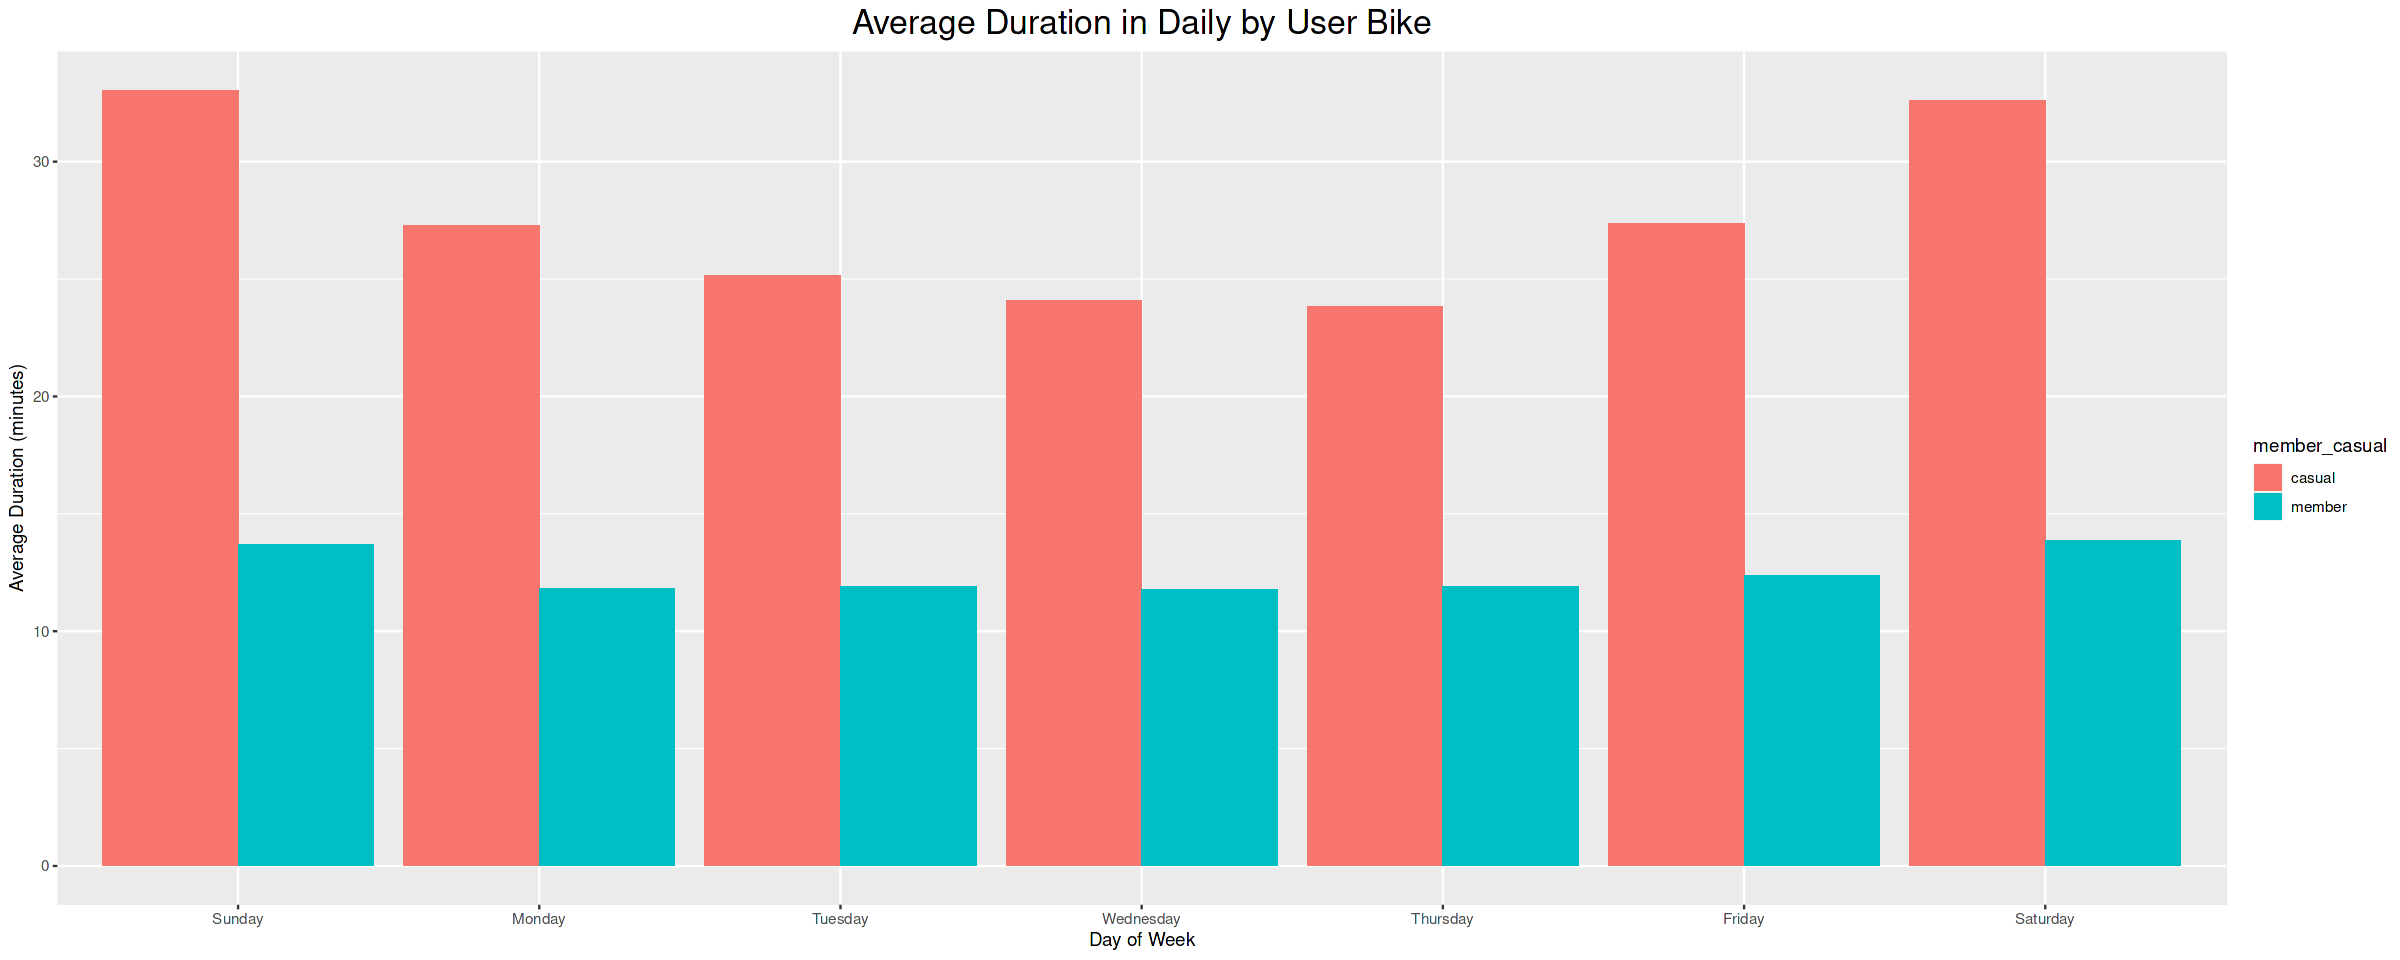

In [20]:
# Average duration in daily basis per riders bike type

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, day_of_week) %>%                   
  summarise(average_duration = mean(ride_length), .groups = 'drop') %>% 		                                        
  arrange(member_casual, day_of_week)	%>%
  ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title="Average Duration in Daily by User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  ylab("Average Duration (minutes)") + 
  xlab("Day of Week")

Using bar chart, the daily average duration trend can be clearly. The trend from casual or members riders bike build shaped like the letter "U" with its peak point on Saturday and Sunday.

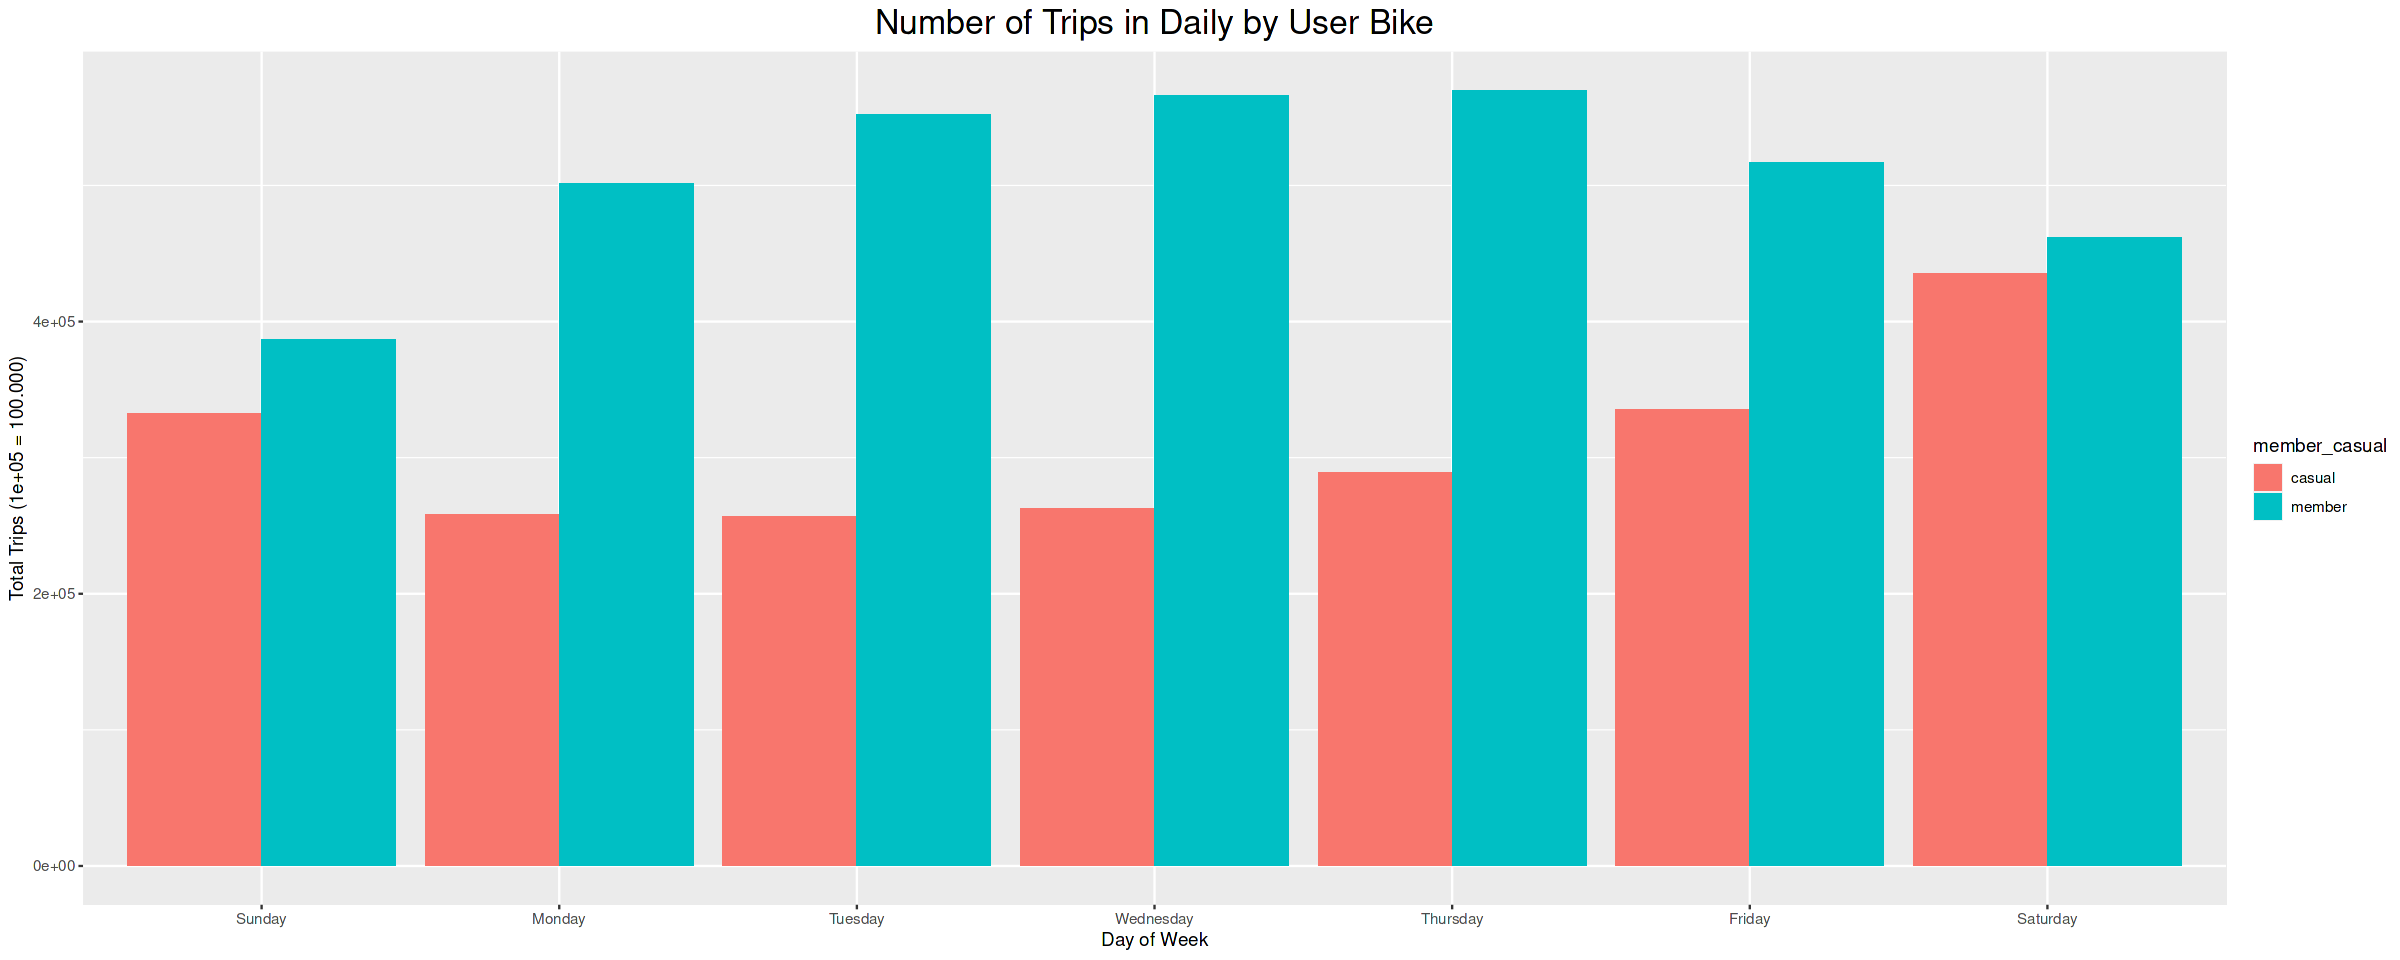

In [21]:
# Number of trips in daily basis per riders bike type

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_trips = n(), .groups = 'drop') %>% 
  arrange(member_casual, day_of_week) %>% 
  ggplot(aes(x = day_of_week, y = number_of_trips, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title="Number of Trips in Daily by User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) + 
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Day of Week")


Next step is look at the pattern for number of trips in daily :
- The peak for member riders bike occurs on Tuesday, Wednesday and Thursday.
- Meanwhile, the peak for casual riders bike occurs on Sunday and Saturday.

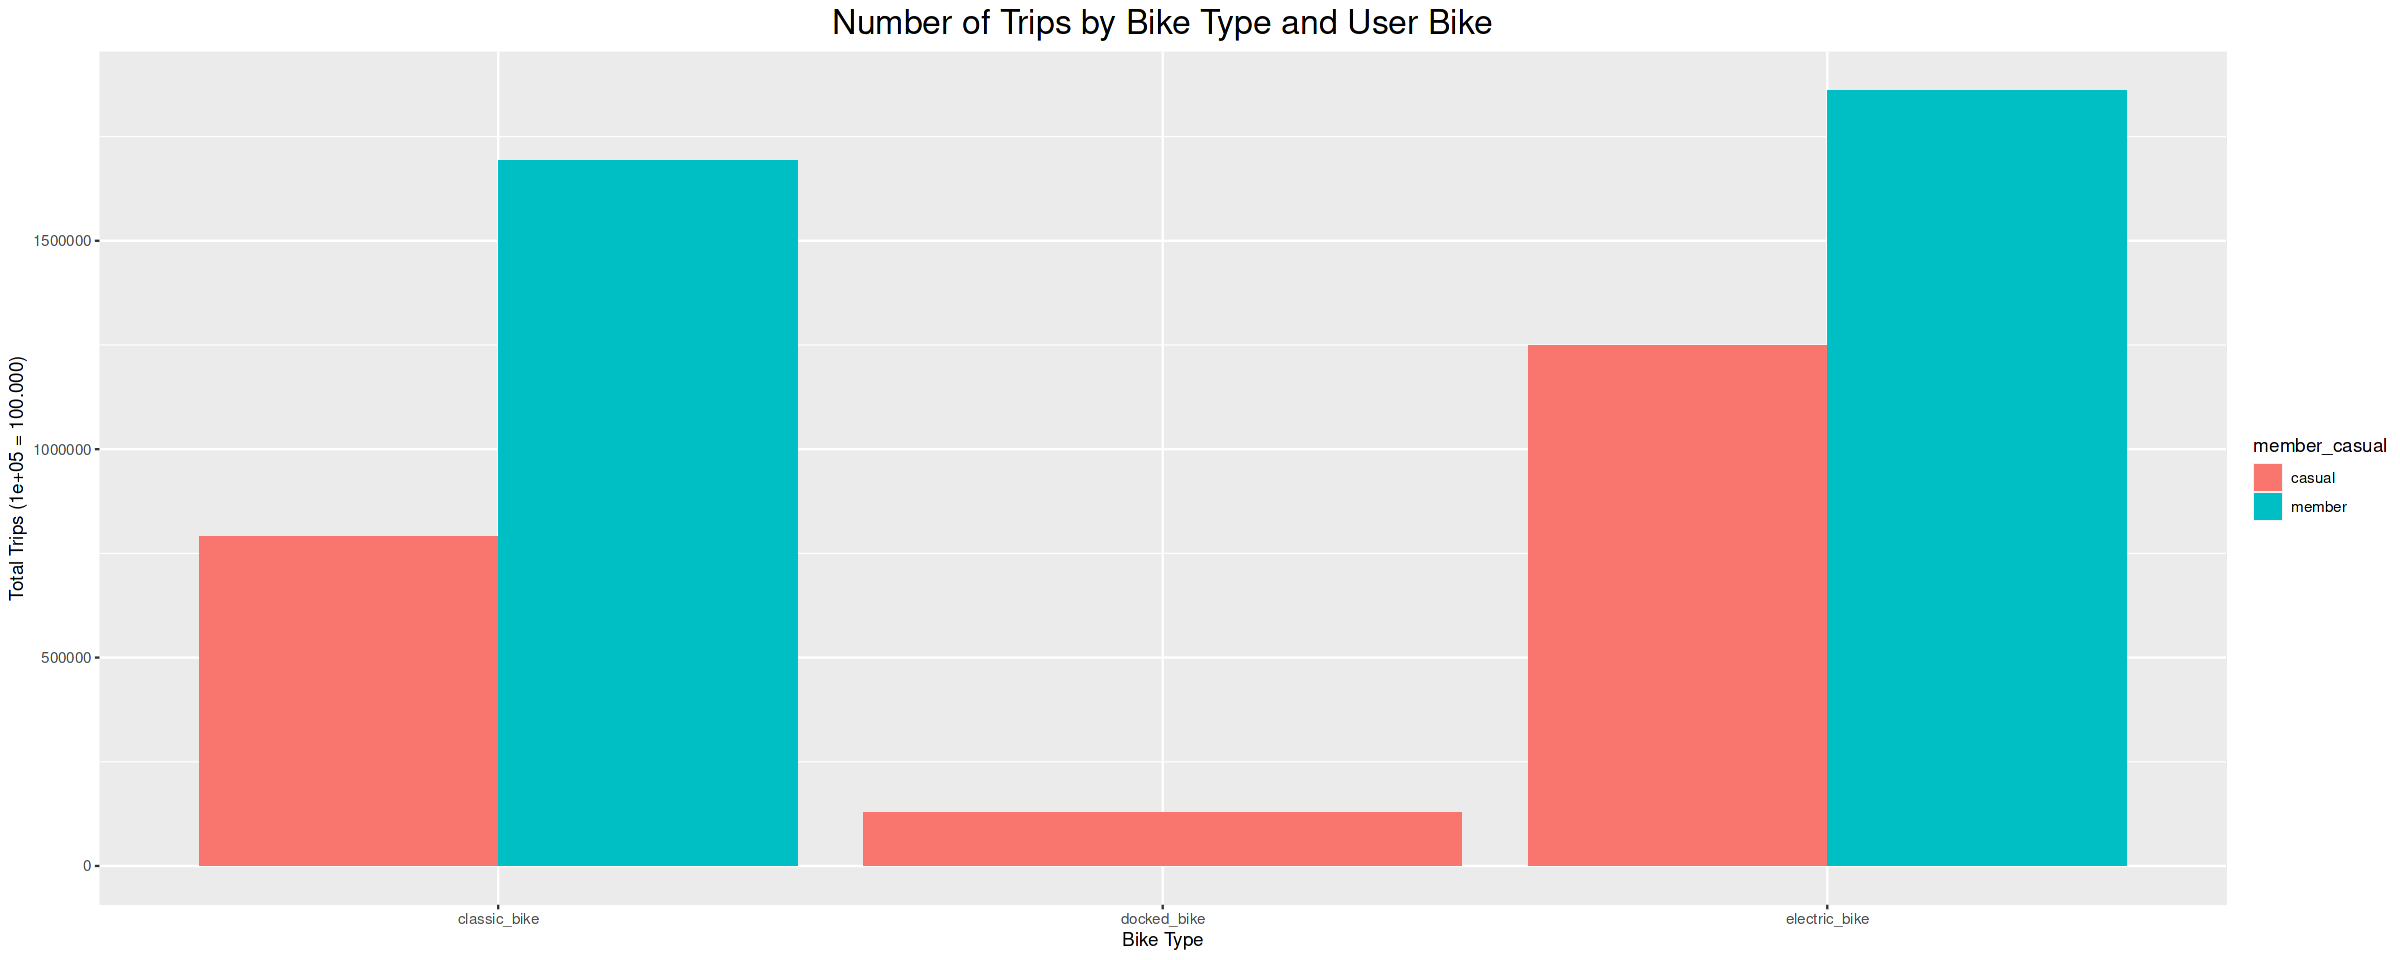

In [22]:
# The proportion per bike type

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, rideable_type) %>% 
  summarise(number_of_trips = n(), .groups = 'drop') %>% 
  arrange(member_casual, rideable_type) %>% 
  ggplot(aes(x = rideable_type, y = number_of_trips, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title="Number of Trips by Bike Type and User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) + 
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Bike Type")


The bike with most large number of tris by member and casual riders bike are electric bikes and classic bikes, especially **electric bikes** which are very popular. Meanwhile, **docked bikes** only used by casual riders bike more inclusive with disabilities user and customer who cannot use standard two-wheeled bicycles.

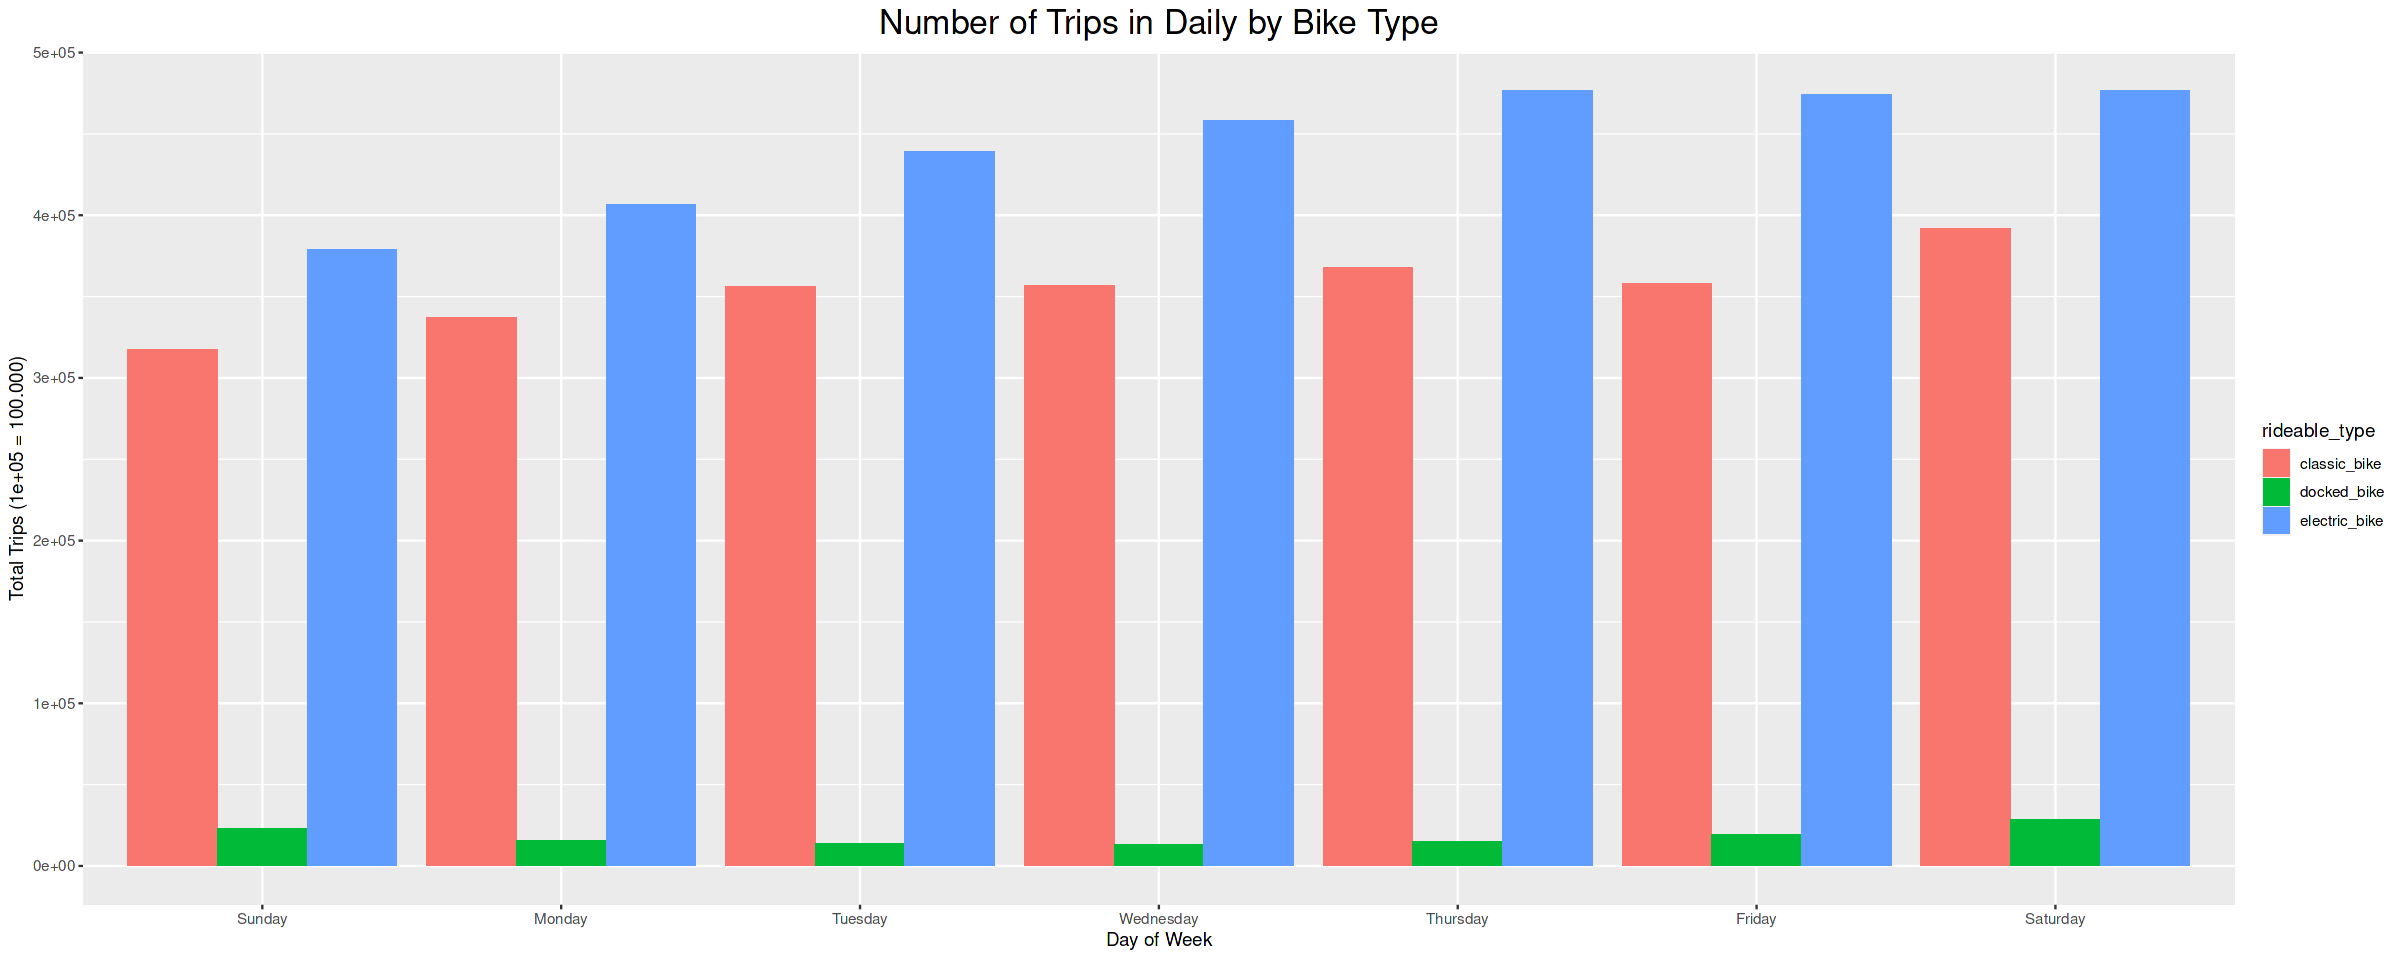

In [23]:
# analyze number of trip in daily by bike type

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(day_of_week, rideable_type) %>% 
  summarise(number_of_trips = n(), .groups = 'drop') %>% 
  arrange(day_of_week, rideable_type) %>% 
  ggplot(aes(x = day_of_week, y = number_of_trips, fill = rideable_type)) +
  geom_col(position = "dodge") +
  labs(title="Number of Trips in Daily by Bike Type") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) + 
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Day of Week")


The number of trips per day is dominated by electric bikes, with trend increase from Sunday until Saturday, with a difference not too far, it's classic bikes which still in great demand. Meanwhile, docked bikes have the lowest number of trips from classic and electric bikes.

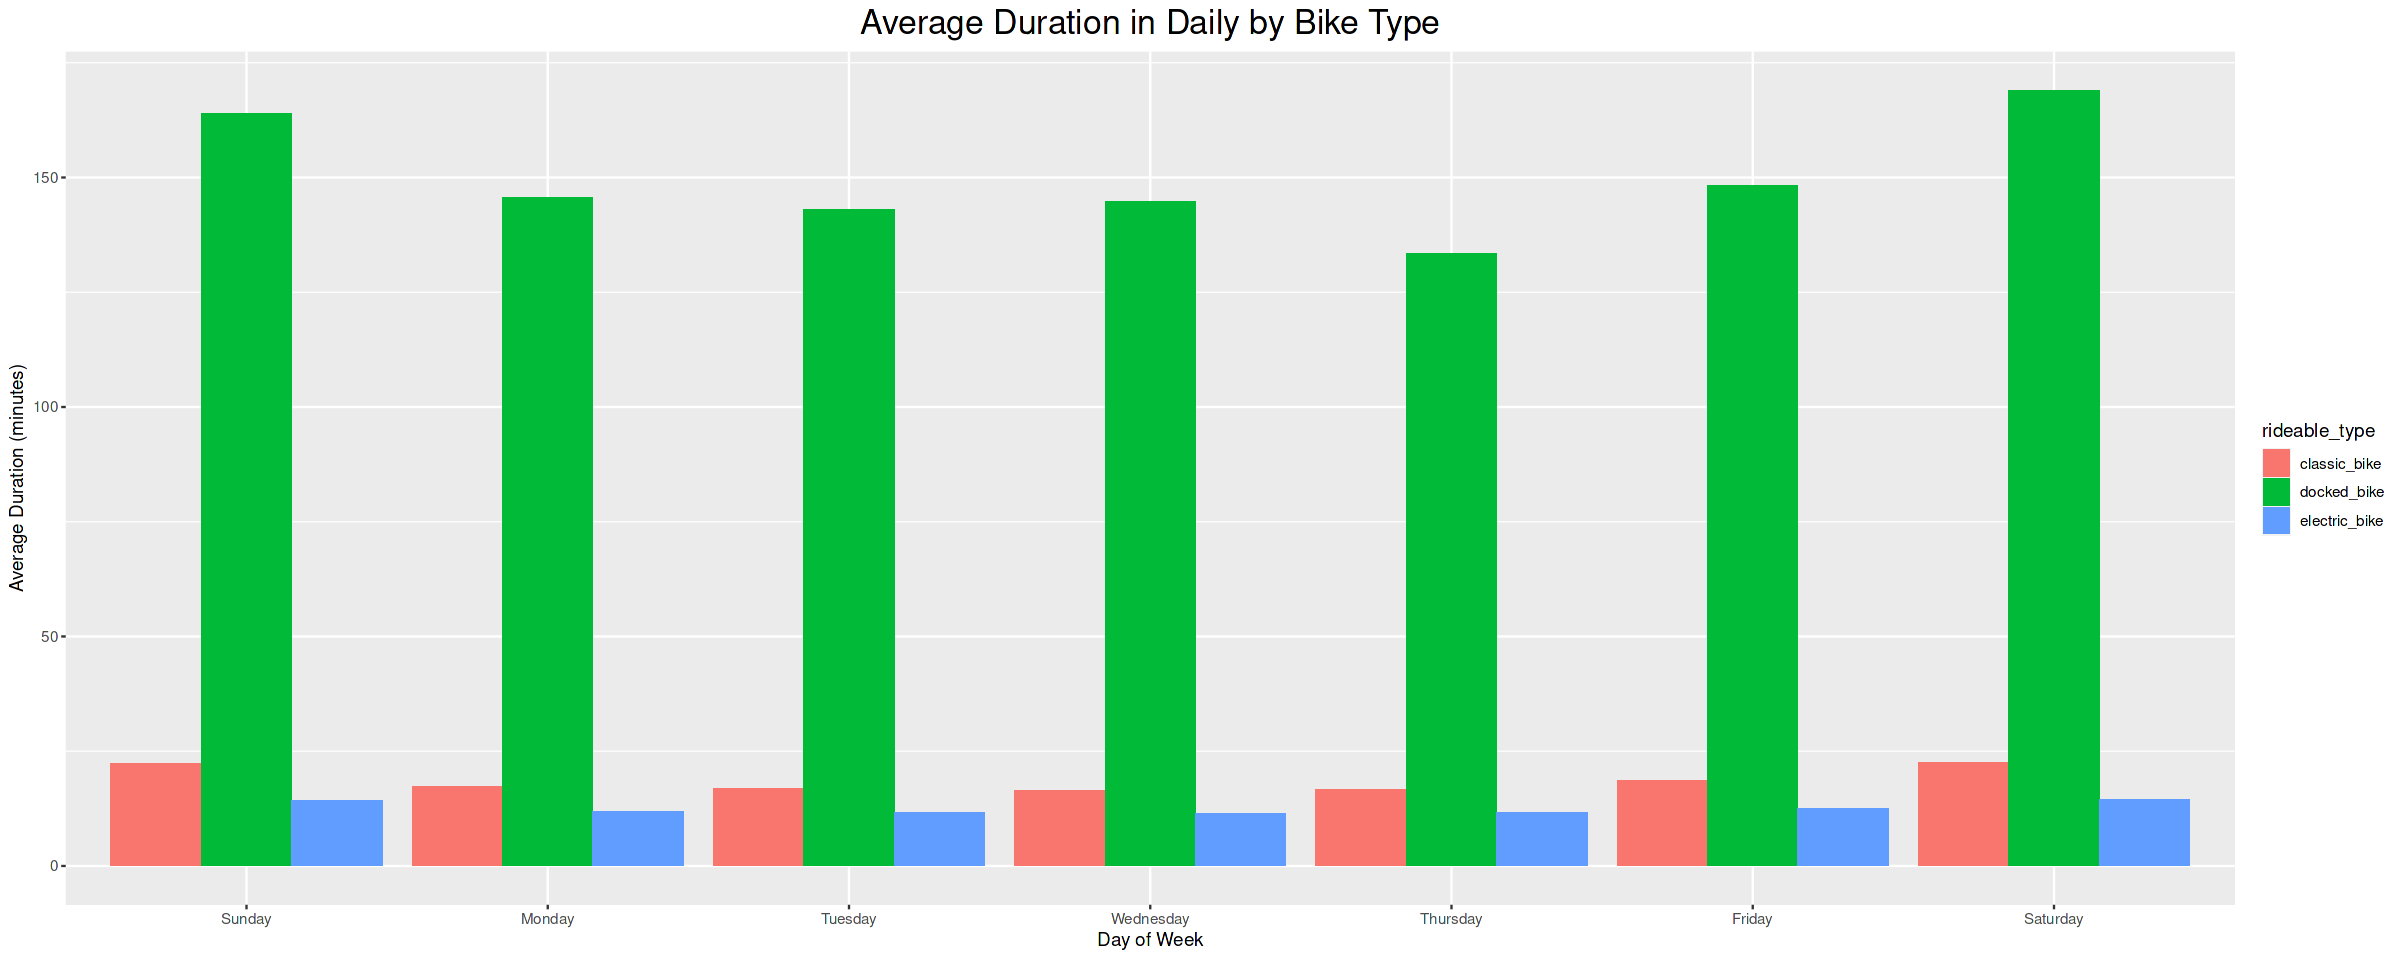

In [24]:
# The average duration in daily by bike type

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(day_of_week, rideable_type) %>% 
  summarise(average_duration = mean(ride_length), .groups = 'drop') %>% 		                                        
  arrange(day_of_week, rideable_type) %>% 
  ggplot(aes(x = day_of_week, y = average_duration, fill = rideable_type)) +
  geom_col(position = "dodge") +
  labs(title="Average Duration in Daily by Bike Type") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) + 
  ylab("Average Duration (minutes)") + 
  xlab("Day of Week")


In [25]:
# Min and Max average duration in daily by bike type

all_trips_v2 %>% 
  group_by(day_of_week, rideable_type) %>% 
  summarise(average_duration = mean(ride_length), .groups = 'drop') %>% 		                                        
  group_by(rideable_type) %>%
  summarise(min_avg = min(average_duration), max_avg = max(average_duration)) %>%
  arrange(min_avg)

rideable_type,min_avg,max_avg
<chr>,<dbl>,<dbl>
electric_bike,11.38551,14.54054
classic_bike,16.38910,22.44024
docked_bike,133.50610,168.98199


The average duration per day for docked bikes have very long usage, with range **133 - 169 minutes** or **2 - 3 hours**, cause are intended of disabilities user so that the average duration for daily is longer when compared to non-disabilities user.

Meanwhile, for electric bikes, the average duration per day is very short, in range of **11–14 minutes**, I think the electric bikes have advantages in duration because electric bikes equipped with electric drive motors which are capable of producing faster speeds.

All right, after analyze in daily period, let's look at the monthly period with line chart.

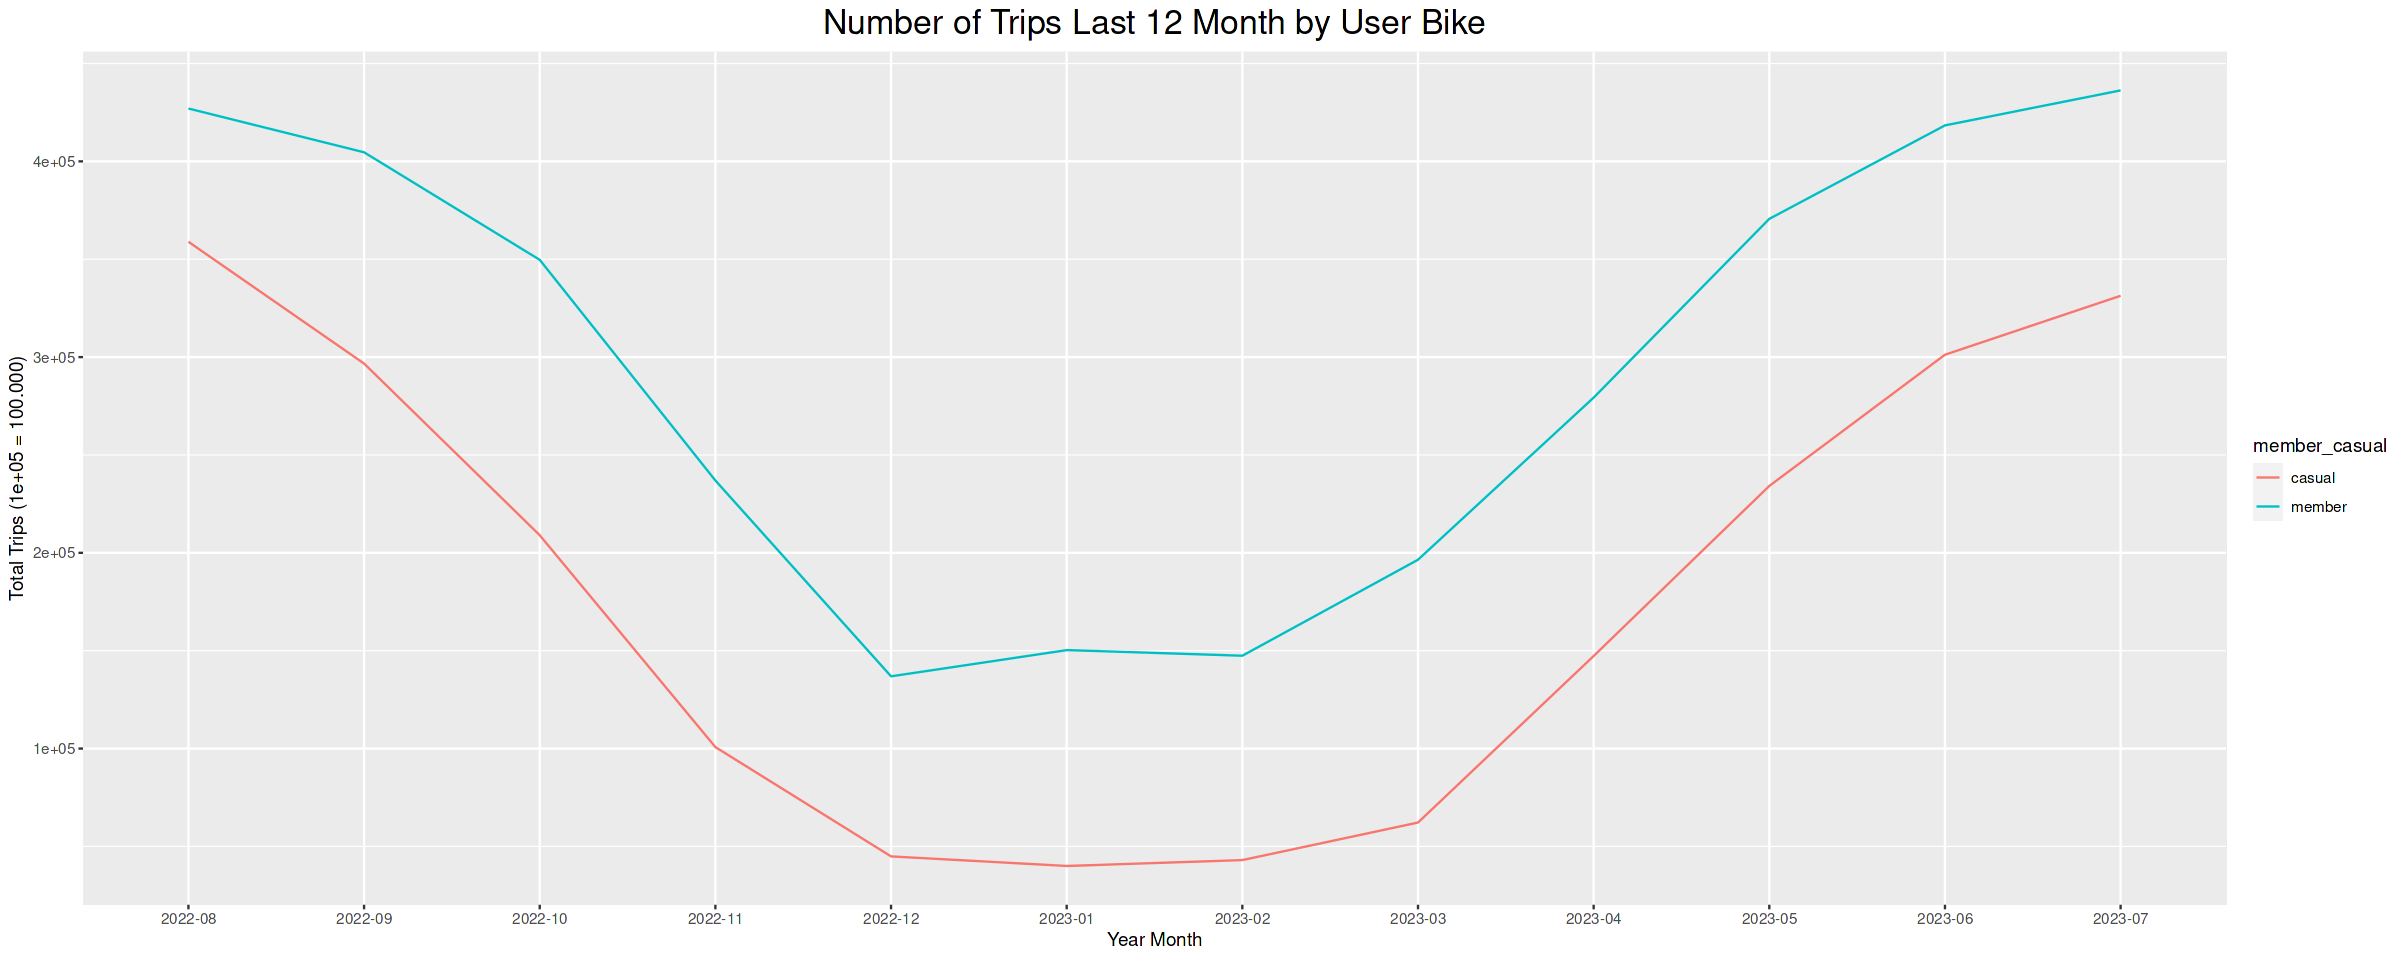

In [26]:
# The number of trips by riders bike type last 12 month

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
  group_by(member_casual, year_month) %>% 
  summarise(number_of_trips = n(), .groups = 'drop') %>% 
  arrange(member_casual, year_month)  %>% 
  ggplot() +
  geom_line(aes(x = year_month, y = number_of_trips, group=member_casual, color=member_casual)) +
  labs(title="Number of Trips Last 12 Month by User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Year Month")

During last 12 months (August 2022 - July 2023) the trend generated by member and casual riders bike was almost the same trend for number of trips. There was a very significant decrease in **December 2022 until February 2023**. 

Maybe it will be easier to see of peak if sort by month.

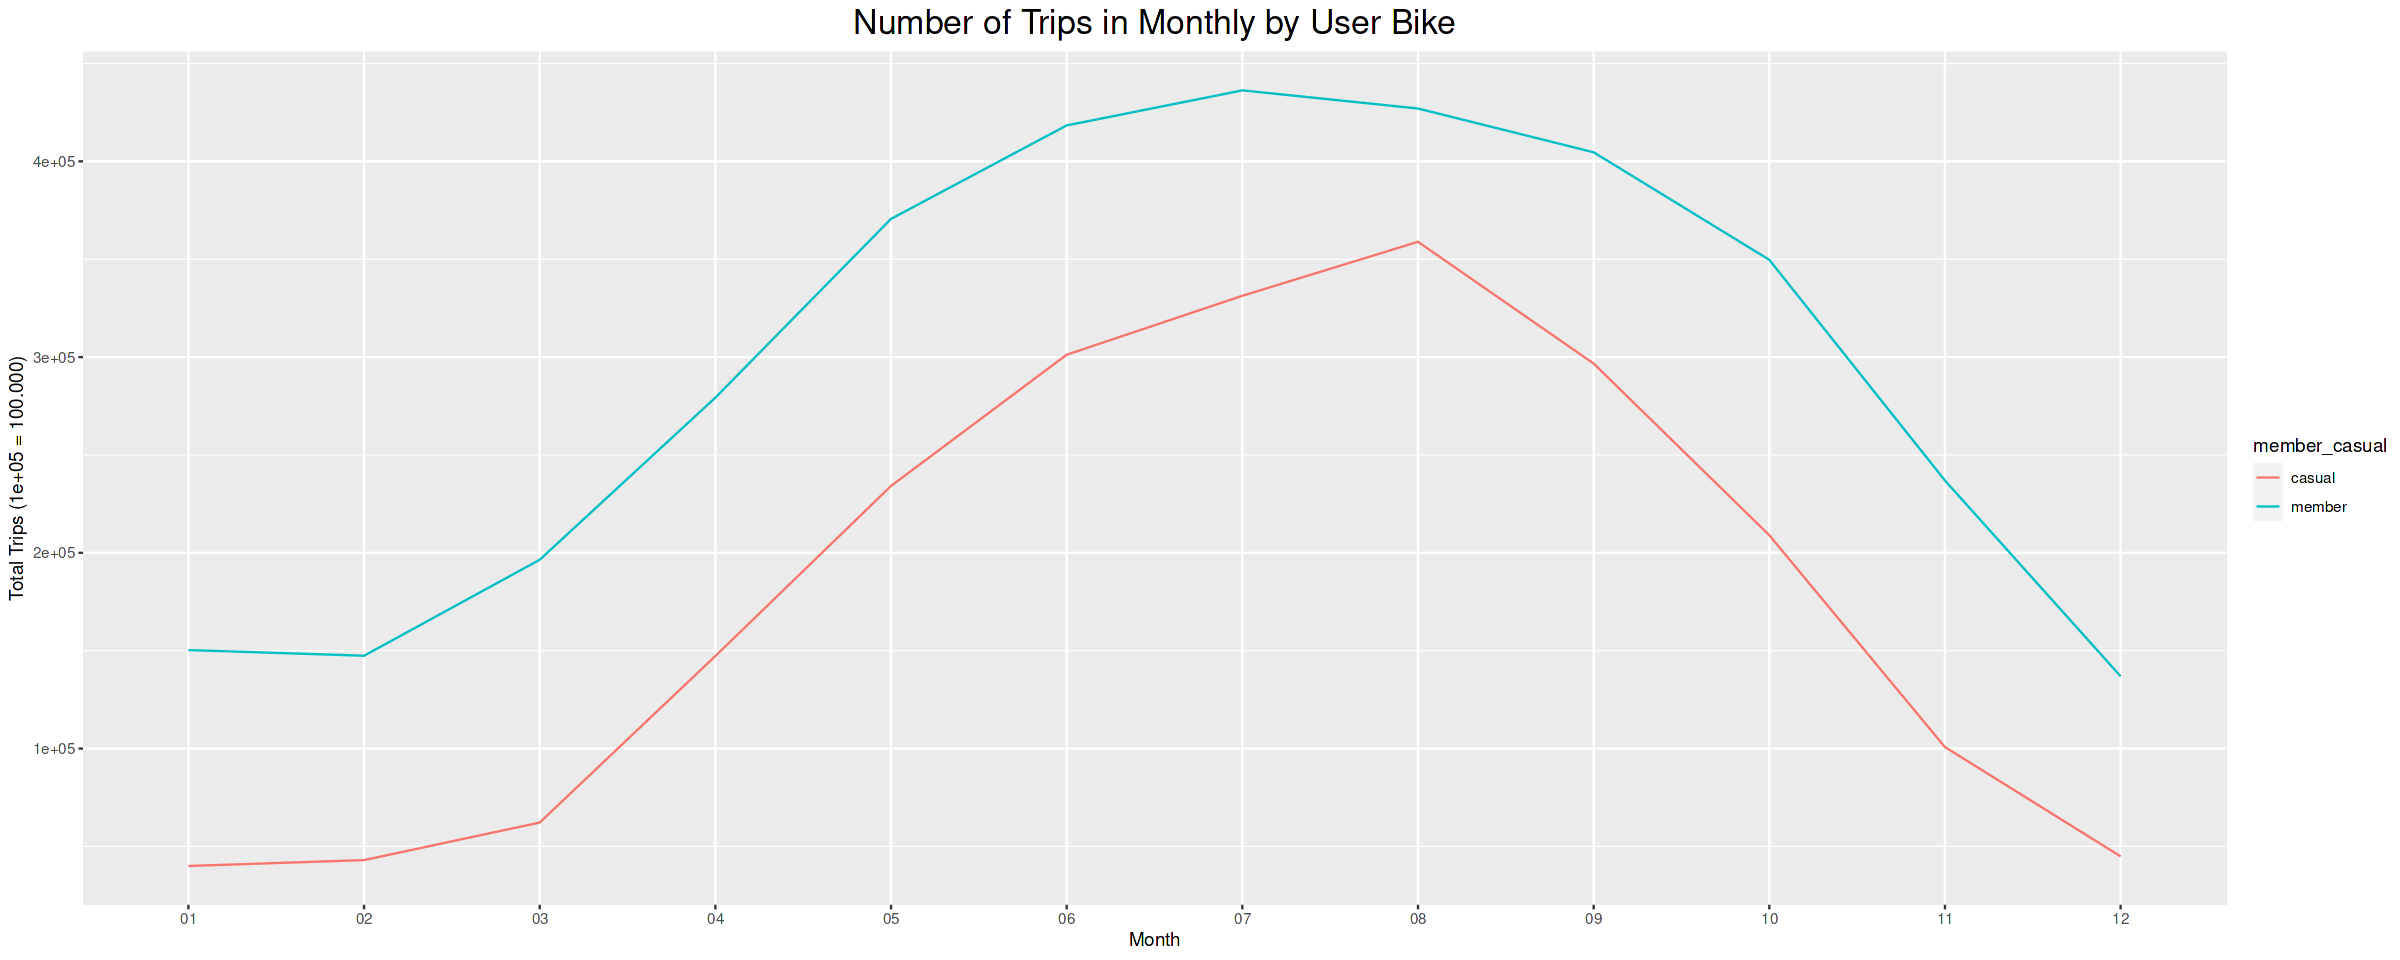

In [27]:
# The number of trips by riders bike type in monthly

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_trips = n(), .groups = 'drop') %>% 
  arrange(member_casual, month)  %>% 
  ggplot() +
  geom_line(aes(x = month, y = number_of_trips, group=member_casual, color=member_casual)) +
  labs(title="Number of Trips in Monthly by User Bike") +
  theme(plot.title = element_text(hjust = 0.5, size = 20))+
  ylab("Total Trips (1e+05 = 100.000)") + 
  xlab("Month")

It can be seen that peak in number of trips casual and member riders bike is almost same in **June (06) - September (09)**.

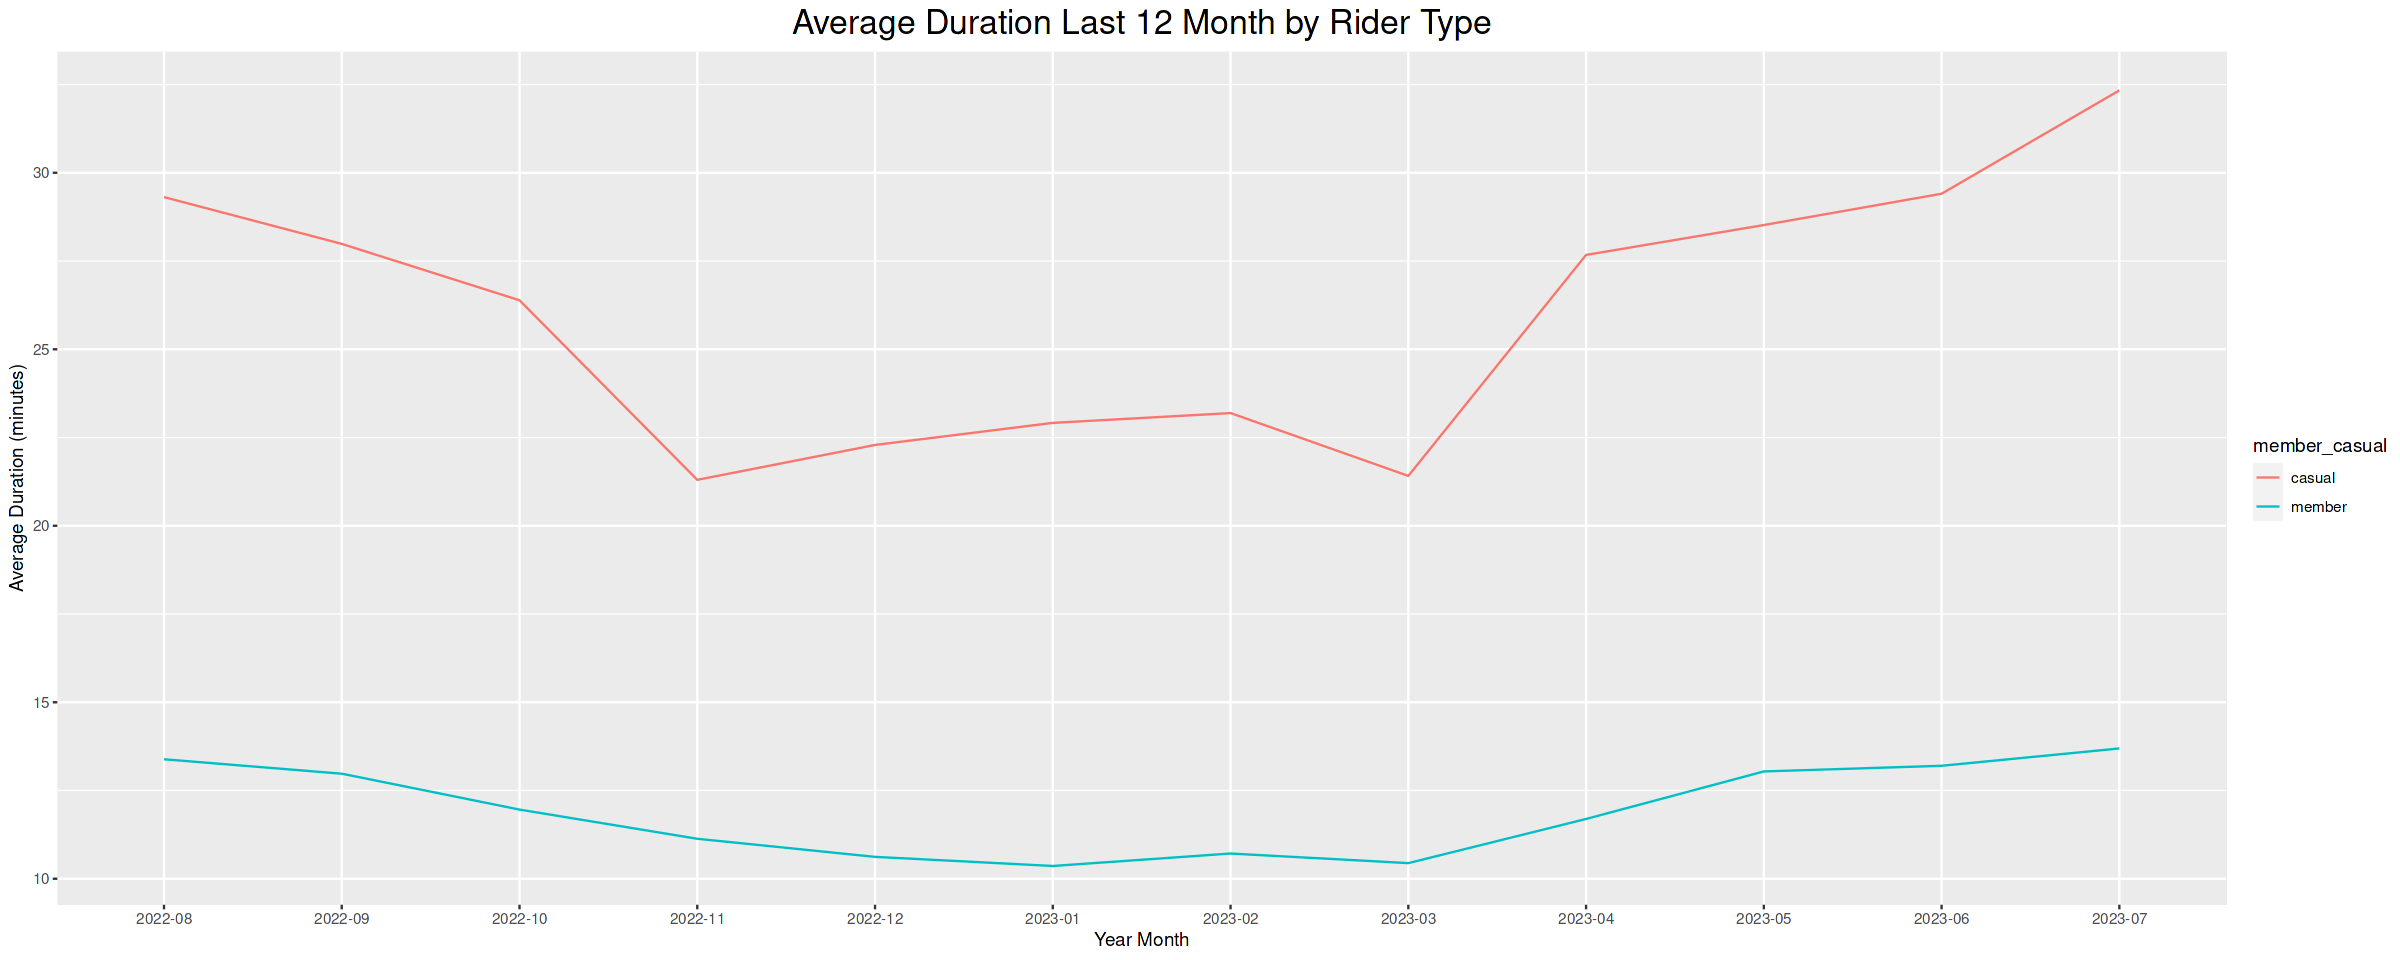

In [28]:
# Let's visualize the average_duration last 12 month

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
  group_by(member_casual, year_month) %>% 
  summarise(average_duration = mean(ride_length), .groups = 'drop') %>% 
  arrange(member_casual, year_month)  %>% 
  ggplot() +
  geom_line(aes(x = year_month, y = average_duration, group=member_casual, color=member_casual)) +
  labs(title="Average Duration Last 12 Month by Rider Type") + 
  theme(plot.title = element_text(hjust = 0.5, size = 20)) +
  ylab("Average Duration (minutes)") + 
  xlab("Year Month")
  

The number of trips have impact on the average duration. During the last 12 months (August 2022 - July 2027), if number of trips is not to much then average duration will be short, especially for member and casual riders bike in **December 2022 - March 2023**.

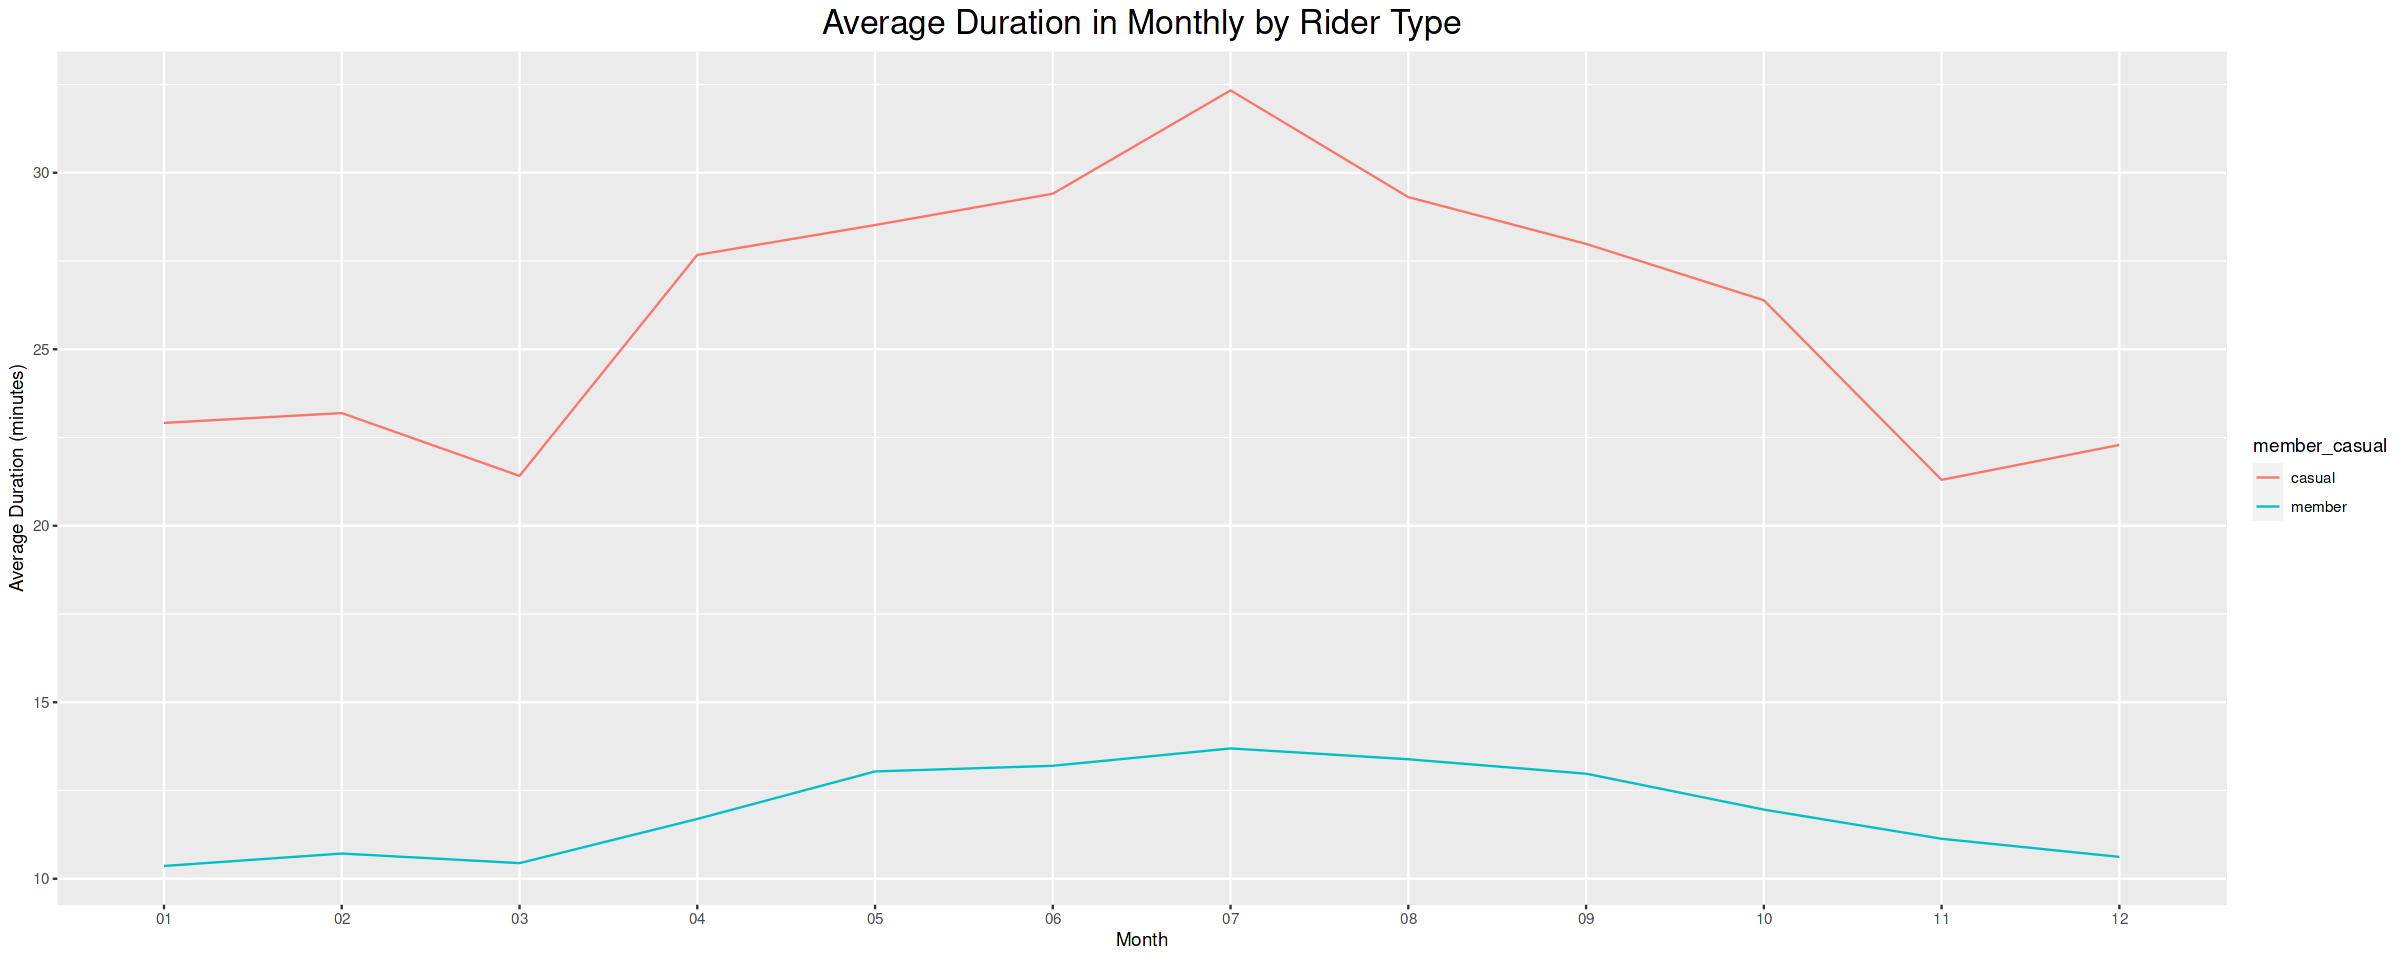

In [29]:
# Let's visualize the average_duration last 12 month

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(average_duration = mean(ride_length), .groups = 'drop') %>% 
  arrange(member_casual, month)  %>% 
  ggplot() +
  geom_line(aes(x = month, y = average_duration, group=member_casual, color=member_casual)) +
  labs(title="Average Duration in Monthly by Rider Type") + 
  theme(plot.title = element_text(hjust = 0.5, size = 20))+
  ylab("Average Duration (minutes)") + 
  xlab("Month")
  

Meanwhile, if sort it by month, the trend will look similar with the peak for longer average duration it happen in **July (07)**.

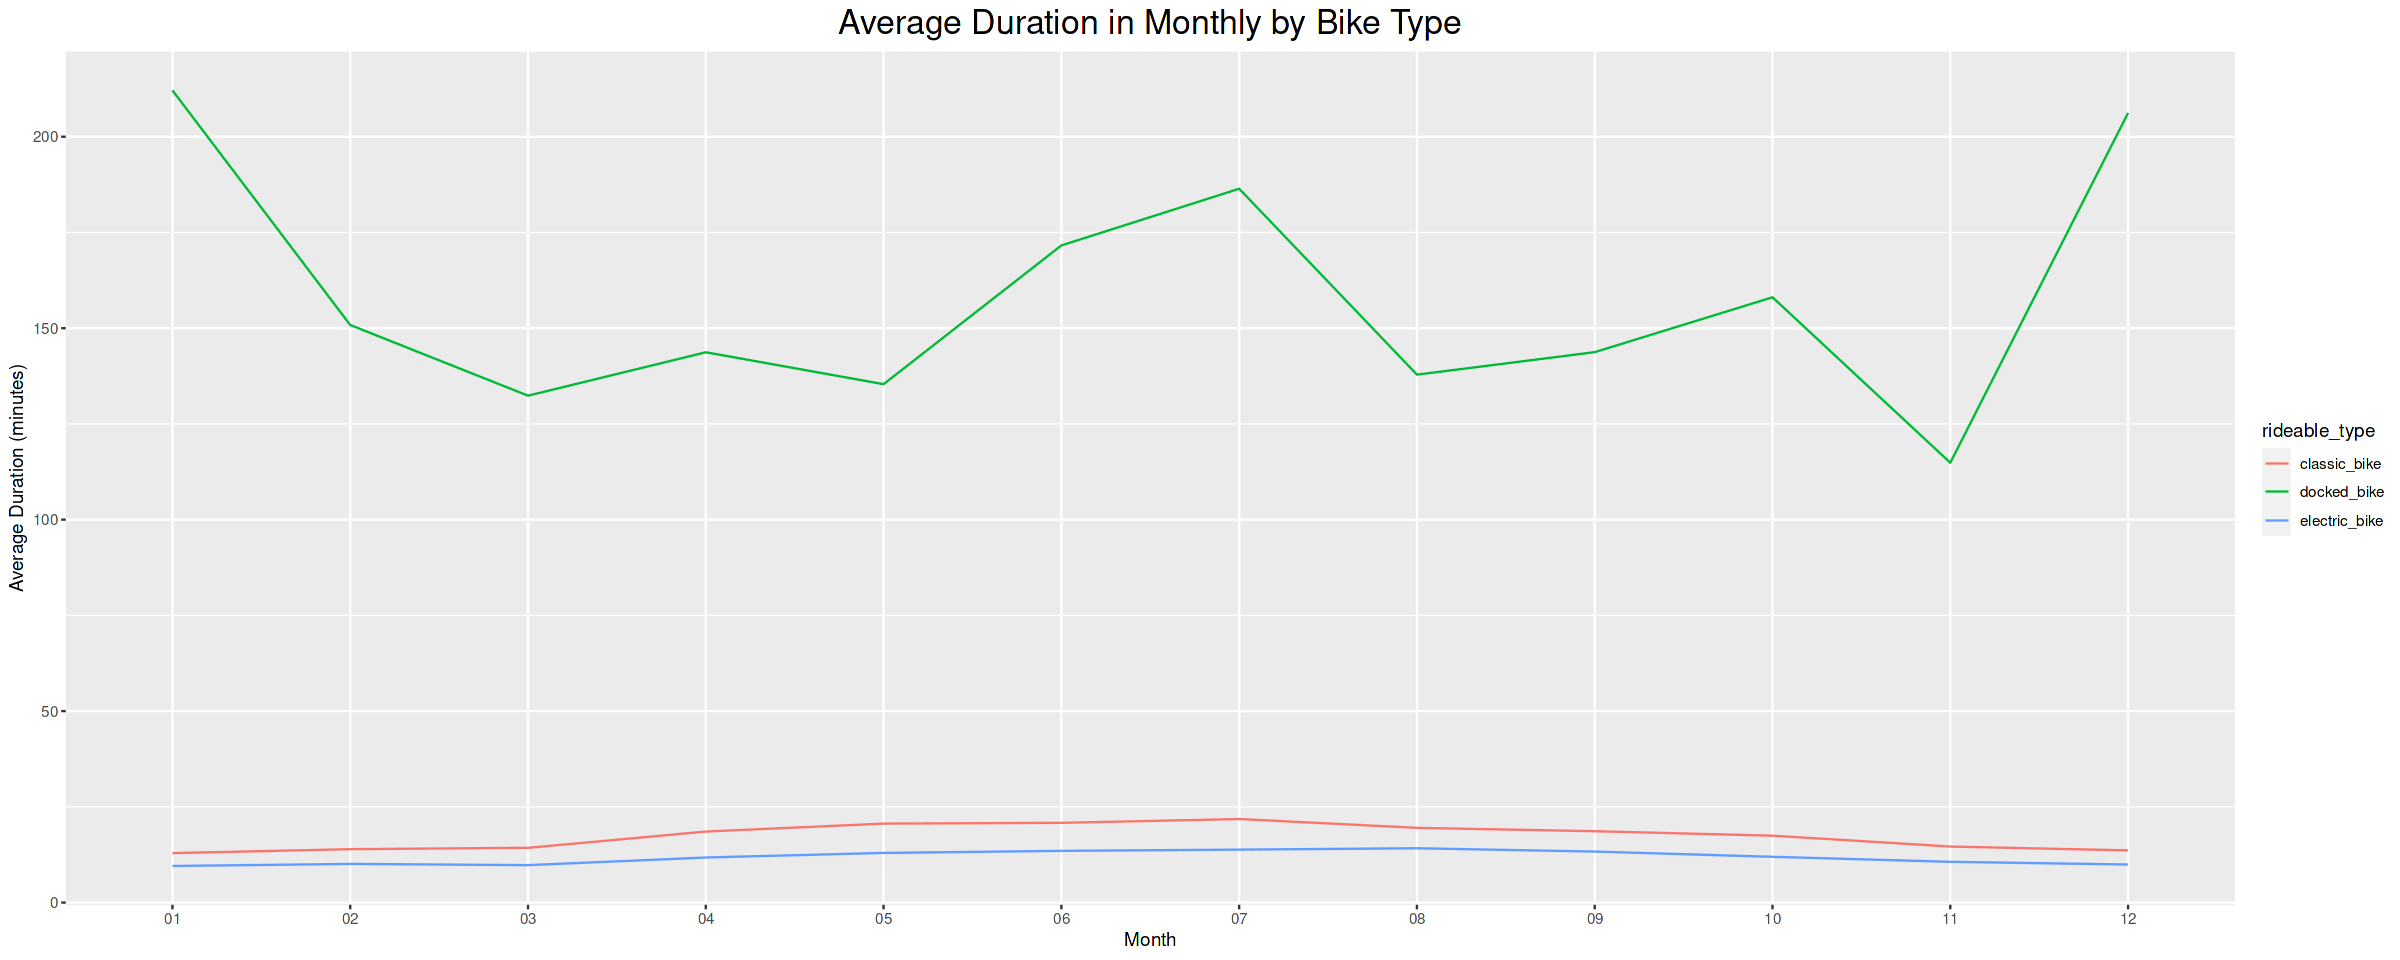

In [30]:
# Let's visualize the average_duration last 12 month

options(repr.plot.width = 20, repr.plot.height = 8)

all_trips_v2 %>% 
  group_by(rideable_type, month) %>% 
  summarise(average_duration = mean(ride_length), .groups = 'drop') %>% 
  arrange(rideable_type, month)  %>% 
  ggplot() +
  geom_line(aes(x = month, y = average_duration, group=rideable_type, color=rideable_type)) +
  labs(title="Average Duration in Monthly by Bike Type") + 
  theme(plot.title = element_text(hjust = 0.5, size = 20))+
  ylab("Average Duration (minutes)") + 
  xlab("Month")
  

In [31]:
all_trips_v2 %>% 
  group_by(rideable_type, month) %>% 
  summarise(average_duration = mean(ride_length), .groups = 'drop') %>% 
  group_by(rideable_type) %>%
  summarise(min_avg = min(average_duration), max_avg = max(average_duration)) %>%
  arrange(min_avg)


rideable_type,min_avg,max_avg
<chr>,<dbl>,<dbl>
electric_bike,9.558053,14.18140
classic_bike,12.915384,21.81924
docked_bike,114.857826,212.10330


And then for bike type, trend average duration for docked bikes have very large gap from electric bikes and classic bikes, if can see from average duration for a docked bikes in range of **115 - 212 minutes** or **2 - 3 hours**. Meanwhile for electric bikes have average duration in range **9 - 14 minutes** and for classic bicycles only in **13 - 22 minutes**.

In [32]:
# Create a csv file that we will visualize in Excel, Tableau, or my presentation software

data <- all_trips_v2 %>% 
        unite(year_month, year, month, sep = '-', remove = FALSE)  %>% 
        group_by(year_month, year, month, member_casual, rideable_type, number_day_of_week, day_of_week) %>% 
        summarise(number_of_trips = n(), total_duration = sum(ride_length), .groups = 'drop') %>% 
        arrange(year_month, member_casual) 
write.csv(data, file = 'summary_of_cyclistic_bike_share_trips.csv')

Finally for result with interactive visualization, I created a dashbourd using tableu. You can see in this : https://public.tableau.com/app/profile/trio.wibowo/viz/CylisticBikeShareTrips/cylisticbikesharetrips

**Identify trend and present the findings**

Here is summary result analysis from above :

- The largest contribution number of trips in cylistic is member riders bike in percentage to 62.09% from overall.
- Electric bikes become most popular and favored by member and casual riders bike.
- While docked bikes have the lowest number of trips because it's intended for disabilities users and all of them come from casual riders bike.
- The average duration for member riders bike is shorter than that of casual, especially for electric bikes which have electric drive motors can make it easier for users.
- The average duration for member and casual riders bike is longest on Saturdays and Sundays, especially for docked bikes which are intended of users disabilities with average duration in range 2 – 3 hours.
- Casual riders bike most of them trips on Sunday and Saturday with longer average duration, I think is defined they use a bike for to relax and enjoy of view.
- Meanwhile, member riders bike mostly trips on weekdays like Tuesday, Wednesday and Thursday to carry out daily activities such as work, shopping, hobbies and so on.
- If look at the trend in monthly, the number of trips is greatly influenced by season and weather conditions.

|Weather|Date|
|-----------|-----------|
|Spring| March, 01 - May, 31|
|Summer| June, 01 - August, 31|
|Fall| September, 01 - November, 30|
|Winter| December, 01 - February, 28|

 source : [in here](https://hikersbay.com/climate/usa/chicago?lang=id)

- The peak from number of trips being in June - September which coincides with Summer or the transition from Summer to Fall. I think it can happen because in Summer many people do outdoor activities from another season.


# Act

**There is some recommendations from me based on result of analysis**


1. Increase the number of electric bikes, that are currently most popular bike and then can improve service for electric bicycles such as system charging, spare batteries, and other spare parts.
2. Arrange bicycle routes with station points that cross office areas, schools, shopping centers, parks and places that have good views, I think it can make new users attract to join and use bicycles.
3. Create a membership type for weekend (Saturday and Sunday) with a different offer price from annual member and casual.
4. Create a special membership for disabilities users, even though the number of trips is not many, if look at the average duration which is in the range of 2–3 hours, it will provide an opportunity to increase member users by offering attractive prices compared to casual users.
5. Create big event/campain in Summer like bicycle racing competition or big-discount for member riders bike.
